# The Battle of the Neighborhoods (Week 2)

### 3. Download and Explore New York city and its Boroughs Cuisine dataset

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays
from project_lib import Project

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Matplotlib version:  3.0.2
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

    python_abi:      3.6-1_cp36m       conda-forge
    wordcloud:       1.4.1-py36_0      conda-forge

The follow

This data is extracted from the wikipedia Page - https://en.wikipedia.org/wiki/Cuisine_of_New_York_City

In [44]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_bfc4314f4dbc43658962219f6d869d66 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='tDIj492-ki1NQTyavxWixjQxpSrU6792uUUBGLlIIT9z',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_bfc4314f4dbc43658962219f6d869d66.get_object(Bucket='week2-donotdelete-pr-f4awcazkri2hts',Key='NYC_CUISINE.CSV')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean"
1,The Bronx,Belmont,"Italian, Albanian"
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,Filipino


In [45]:
df_data_0.shape

(57, 3)

In [46]:
print(df_data_0.Borough.unique())

['The Bronx' 'Queens' 'Brooklyn' 'Staten Island' 'Manhattan']


In [47]:
df_data_0['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Manhattan,13
Queens,13
The Bronx,9
Staten Island,3


### 1. NEW YORK CITY CUISINE - WORD CLOUD

In [48]:
CUISINE_WC = df_data_0[['Cuisine']]
CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian"
2,"Italian, Seafood"
3,"Italian, Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish
9,"Greek, Italian, Eastern European, Brazilian, ..."


In [49]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

In [50]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

In [51]:
stopwords = set(STOPWORDS)

In [52]:
# instantiate a word cloud object
NYC_CUISINE_WC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_WC.generate(CUISINE_WC1)

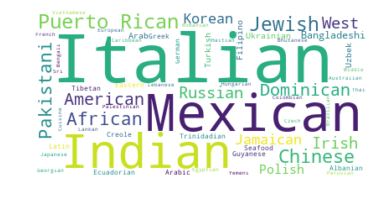

<Figure size 2160x3240 with 0 Axes>

In [53]:
# display the word cloud
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

1. Italian
1. Mexican
1. Indian

### BROOKLYN CUISINE - WORD CLOUD

In [54]:
Brooklyn_data = df_data_0[df_data_0['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Cuisine
0,Brooklyn,Bay Ridge,"Irish, Italian, Greek, Turkish, Lebanese, Pal..."
1,Brooklyn,Bedford-Stuyvesant,"African-American, Jamaican, Trinidadian, Puert..."
2,Brooklyn,Bensonhurst,"Italian, Chinese, Turkish, Russian, Mexican, ..."
3,Brooklyn,Borough Park,"Jewish, Italian, Mexican, Chinese"
4,Brooklyn,Brighton Beach,"Russian, Georgian, Turkish, Pakistani and Ukr..."


In [55]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC

,Cuisine
0,"Irish, Italian, Greek, Turkish, Lebanese, Pal..."
1,"African-American, Jamaican, Trinidadian, Puert..."
2,"Italian, Chinese, Turkish, Russian, Mexican, ..."
3,"Jewish, Italian, Mexican, Chinese"
4,"Russian, Georgian, Turkish, Pakistani and Ukr..."
5,"Puerto Rican, Mexican, Dominican, and Ecuadorian"
6,"Jamaican, West Indian, African-American"
7,Italian
8,"Jamaican, West Indian, and Jewish"
9,African


In [56]:
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)

In [57]:
BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()

In [58]:
stopwords = set(STOPWORDS)

In [59]:
# instantiate a word cloud object
BR_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BR_CUISINE_NYC.generate(BR_CUISINE_WC)

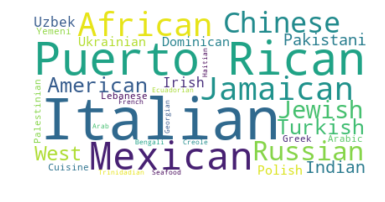

<Figure size 2160x3240 with 0 Axes>

In [60]:
# display the word cloud
plt.imshow(BR_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

1. Italian
1. Puerto Rican
1. Mexican

### QUEENS CUISINE - WORD CLOUD

In [61]:
Queens_data = df_data_0[df_data_0['Borough'] == 'Queens'].reset_index(drop=True)
Queens_data.head()

,Borough,Neighborhood,Cuisine
0,Queens,Astoria,"Greek, Italian, Eastern European, Brazilian, ..."
1,Queens,Bellerose,Indian and Pakistani
2,Queens,Flushing,Chinese and Korean
3,Queens,Forest Hills;Kew Gardens Hills;Rego Park,"Jewish, Russian and Uzbek"
4,Queens,Howard Beach;Ozone Park,Italian


In [62]:
Q_CUISINE_WC = Queens_data[['Cuisine']]
Q_CUISINE_WC

,Cuisine
0,"Greek, Italian, Eastern European, Brazilian, ..."
1,Indian and Pakistani
2,Chinese and Korean
3,"Jewish, Russian and Uzbek"
4,Italian
5,German and Polish
6,"Indian, Pakistani, Bangladeshi, Colombian, Ec..."
7,"Bangladeshi, Caribbean; African-American; Afr..."
8,"Arab, Chinese, and Italian"
9,"Indian, Guyanese, Trinidadian, Pakistani, Ban..."


In [63]:
Q_CUISINE_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)

In [64]:
Q_CUISINE_WC = open('Q_CUISINE.txt', 'r').read()

In [65]:
stopwords = set(STOPWORDS)

In [66]:
# instantiate a word cloud object
Q_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
Q_CUISINE_NYC.generate(Q_CUISINE_WC)

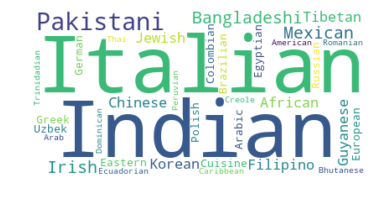

<Figure size 2160x3240 with 0 Axes>

In [67]:
# display the word cloud
plt.imshow(Q_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

1. Italian
1. Indian
1. Pakistani

### MANHATTAN CUISINE - WORD CLOUD

In [68]:
Manhattan_data = df_data_0[df_data_0['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan_data.head()

,Borough,Neighborhood,Cuisine
0,Manhattan,Chinatown,Chinese and Vietnamese
1,Manhattan,East Harlem,"Puerto Rican, Mexican, Dominican, Chinese"
2,Manhattan,East Village,"Japanese, Korean, Indian and Ukrainian"
3,Manhattan,Greenwich Village,Italian and Middle Eastern
4,Manhattan,Harlem,"Italian, African-American, Latin American, We..."


In [69]:
MN_CUISINE_WC = Manhattan_data[['Cuisine']]
MN_CUISINE_WC

,Cuisine
0,Chinese and Vietnamese
1,"Puerto Rican, Mexican, Dominican, Chinese"
2,"Japanese, Korean, Indian and Ukrainian"
3,Italian and Middle Eastern
4,"Italian, African-American, Latin American, We..."
5,Korean
6,Australian
7,Italian
8,"Puerto Rican, Jewish, Italian, and Latin Amer..."
9,"Indian, Pakistani and Bangladeshi"


In [70]:
MN_CUISINE_WC.to_csv('MN_CUISINE.txt', sep=',', index=False)

In [71]:
MN_CUISINE_WC = open('MN_CUISINE.txt', 'r').read()

In [72]:
stopwords = set(STOPWORDS)

In [73]:
# instantiate a word cloud object
MN_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
MN_CUISINE_NYC.generate(MN_CUISINE_WC)

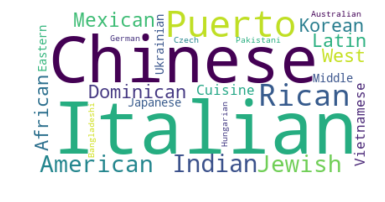

<Figure size 2160x3240 with 0 Axes>

In [74]:
# display the word cloud
plt.imshow(MN_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

1. Italian
1. Chinese
1. Puerto Rican

### THE BRONX CUISINE - WORD CLOUD

In [75]:
Bronx_data = df_data_0[df_data_0['Borough'] == 'The Bronx'].reset_index(drop=True)
Bronx_data.head()

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean"
1,The Bronx,Belmont,"Italian, Albanian"
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,Filipino


In [76]:
BX_CUISINE_WC = Bronx_data[['Cuisine']]
BX_CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian"
2,"Italian, Seafood"
3,"Italian, Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish


In [77]:
BX_CUISINE_WC.to_csv('BX_CUISINE.txt', sep=',', index=False)

In [78]:
BX_CUISINE_WC = open('BX_CUISINE.txt', 'r').read()

In [79]:
stopwords = set(STOPWORDS)

In [80]:
# instantiate a word cloud object
BX_CUISINE_NYC = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
BX_CUISINE_NYC.generate(BX_CUISINE_WC)

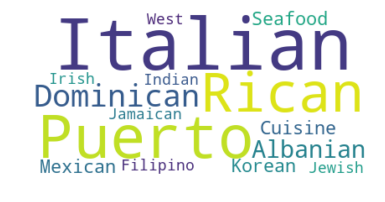

<Figure size 2160x3240 with 0 Axes>

In [81]:
# display the word cloud
plt.imshow(BX_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

1. Italian
1. Puerto Rican
1. Dominican